<a href="https://colab.research.google.com/github/skdixodnr/my_study/blob/main/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05/17 Dicision Tree

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression #classification
# Log = LogisticRegression()
# Log.fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#모델 만들기
from sklearn.neighbors import KNeighborsClassifier 
for i in (1,3,5,7):
    for j in ('uniform','distance'):
        for k in ('auto','ball_tree','kd_tree','brute'):
            model = KNeighborsClassifier(n_neighbors=i, weights=j,algorithm=k)
            model.fit(X_train,y_train)
            y_p = model.predict(X_test)
            relation_square = model.score(X_test,y_test)
            from sklearn.metrics import confusion_matrix, classification_report
            knn_matrix = confusion_matrix(y_test,y_p)
            print(knn_matrix)
            target_names = ['setosa','versicolor','virginica']
            knn_result = classification_report(y_test,y_p,target_names=target_names)
            print(knn_result)
    print('\n')
print('\n')

In [ ]:
print('accuracy : {:.2f}'.format(knn.score(X_test,y_test)))

accuracy : 0.93


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
print('accuracy : {:.2f}'.format(DT.score(X_test,y_test)))

accuracy : 0.93


[Text(0.3333333333333333, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.2222222222222222, 0.7857142857142857, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.4444444444444444, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.2222222222222222, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[3] <= 1.7\ngini = 0.093\nsamples = 41\nvalue = [0, 2, 39]'),
 Text(0.5555555555555556, 0.5, 'x[2] <= 4.95\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.4444444444444444, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6666666666666666, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text

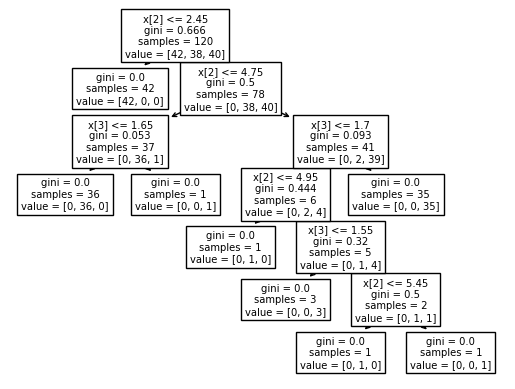

In [ ]:
from sklearn import tree
tree.plot_tree(DT)

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(DT, #모델
                out_file='iris_tree.dot', #저장경로 설정
                feature_names=iris.feature_names, #변수명
                class_names=iris.target_names, #종속변수
                rounded= True,
                filled=True)
Source.from_file('iris_tree.dot')

Feature importances:
[0.    0.    0.954 0.046]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.954
petal width (cm) : 0.046


<Axes: >

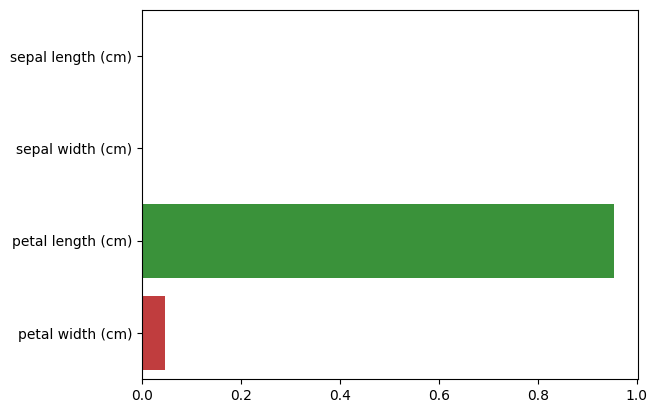

In [ ]:
import seaborn as sns
# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(DT.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names , DT.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=DT.feature_importances_ , y=iris.feature_names)

- Naive baye(나이브 베이즈 분류)

ex) Label이 여러개인 나이브 베이즈

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [ ]:
wine.data.shape

(178, 13)

In [ ]:
wine.target

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#Split dataset into training set and test set
# 70% training and 30% test
X_train,X_test,y_train,y_test = train_test_split(wine.data, wine.target, test_size=0.3,
                                                 random_state= 2023)

# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train,y_train)

#predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9629629629629629


나이브 베이즈의 장단점


- 장점

1. 간단하고, 빠르며, 정확한 모델입니다.

2. computation cost가 작습니다. (따라서 빠릅니다.)

3. 큰 데이터셋에 적합합니다.

4. 연속형보다 이산형 데이터에서 성능이 좋습니다.

5. Multiple class 예측을 위해서도 사용할 수 있습니다.

- 단점

 - feature 간의 독립성이 있어야 합니다. 하지만 실제 데이터에서 모든 feature가 독립인 경우는 드뭅니다. 장점이 많지만 feature가 서로 독립이어야 한다는 크리티컬한 단점이 있습니다.

 - feature간 독립성이 있다는 말은 feature간에 서로 상관관계가 없다는 뜻입니다. X1과 X2라는 feature가 있을 때 X1이 증가하면 X2도 같이 증가한다고 합시다. 그럼 X1과 X2는 서로 상관관계가 있다고 말할 수 있고, 이는 X1과 X2가 독립성이 없다는 뜻입니다. X1과 X2가 독립성이 있으려면 X1이 증가하든 말든, X2에는 아무런 영향을 미치지 않아야 합니다. 하지만 우리가 얻을 수 있는 데이터에서는 feature간의 독립성이 항상 보장되지는 않습니다. 나이브 베이즈 모델은 feature간 독립성이 있다는 가정하에 성립되는 모델이기 때문에 실생활에서 바로 적용하기는 어려움있습니다.

 **결정트리와 앙상블**
 - 결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하여, 이로 인한 과적합(Overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있습니다.

 - 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용. 앙상블은 매우 많은 여러개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시키는데, 결정트리가 좋은 약한 학습기가 되기 때문(GBM, LightGBM etc)


# 결정트리(Dicision Tree)

- 일반적으로 쉽게 표현하는 방법은 if/else 로 스무고개 게임을 한다고 생각하면 된다.


- 결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델 중 하나입니다. 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다. 매, 펭귄, 돌고래, 곰을 구분한다고 생각해봅시다. 매와 펭귄은 날개를 있고, 돌고래와 곰은 날개가 없습니다. '날개가 있나요?'라는 질문을 통해 매, 펭귄 / 돌고래, 곰을 나눌 수 있습니다. 매와 펭귄은 '날 수 있나요?'라는 질문으로 나눌 수 있고, 돌고래와 곰은 '지느러미가 있나요?'라는 질문으로 나눌 수 있습니다. 

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png' width=700 height=300>
</figure>

특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 함.

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdy5OwG%2FbtqDwdHofoT%2FNtDy9lqXkhWTRTwEz6txd0%2Fimg.png' width=700 height=300>
</figure>

많은 규칙이 있으면 분류를 결정하는 방식이 복잡해짐-> 과적합으로 이어지기 쉬움

**결론 :트리가 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음.** 
참고 : https://jaaamj.tistory.com/21



### 데이터의 균일도

<figure>
    <img src='https://blog.kakaocdn.net/dn/dhoo7N/btqDvzqEhPH/QdOsfkqc2hcwHISIh0peo1/img.png' width=700 height=300>
</figure>

참고 : https://jaaamj.tistory.com/21

위 그림에서는 C > B > A 순으로 균일도가 높다고 할 수 있습니다. C는 모두 파란색 공으로 데이터가 모두 균일한 상태입니다. B의 경우는 일부의 하얀색 공을 가지고 있지만 대부분 파란색 공으로 구성되어 있어 C다음으로 균일도가 높습니다


이러한 데이터 세트에서 균일도는 데이터를 구분하는데 있어서 필요한 정보의 양에 영향을 미치게 됩니다.

 

정보의 균일도를 측정하는 대표적인 방법에는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니계수가 있습니다.

### 불순도(Impurity)


불순도(Impurity)란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻합니다. 아래 그림에서 위쪽 범주는 불순도가 낮고, 아래쪽 범주는 불순도가 높습니다. 바꾸어 말하면 위쪽 범주는 순도(Purity)가 높고, 아래쪽 범주는 순도가 낮습니다. 위쪽 범주는 다 빨간점인데 하나만 파란점이므로 불순도가 낮다고 할 수 있습니다. 반면 아래쪽 범주는 5개는 파란점, 3개는 빨간점으로 서로 다른 데이터가 많이 섞여 있어 불순도가 높습니다.


<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png' width=400 height=300>
</figure>


출처: ratsgo's blog



한 범주에 하나의 데이터만 있다면 불순도가 최소(혹은 순도가 최대)이고, 한 범주 안에 서로 다른 두 데이터가 정확히 반반 있다면 불순도가 최대(혹은 순도가 최소)입니다. 결정 트리는 불순도를 최소화(혹은 순도를 최대화)하는 방향으로 학습을 진행합니다.

엔트로피(Entropy)는 불순도(Impurity)를 수치적으로 나타낸 척도입니다. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮다는 뜻입니다. 엔트로피가 1이면 불순도가 최대입니다. 즉, 한 범주 안에 서로 다른 데이터가 정확히 반반 있다는 뜻입니다. 엔트로피가 0이면 불순도는 최소입니다. 한 범주 안에 하나의 데이터만 있다는 뜻입니다. 엔트로피를 구하는 공식은 아래와 같습니다

<figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FpL6pO%2FbtqwVDN1V94%2FTYgn5iFrPTfgdVwZhxVKl1%2Fimg.png' width=500 height=100>
</figure>

**Pi = 한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터의 비율**






#### 정보 이득(Information Gain)

정보 이득은 엔트로피라는 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉, 1-엔트로피 지수. 결정트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할


#### 지니 계수(Gini Index)

원래 결제학에서 불평등 지수를 나타낼 때 사용하는 계수. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등함. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석 되어, 계수가 낮은 속성을 기준으로 분할.

순도와 관련해 부연설명을 드리면 A 영역에 속한 모든 레코드가 동일한 범주에 속할 경우(=불확실성 최소=순도 최대) 엔트로피는 0입니다. 반대로 범주가 둘뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우(=불확실성 최대=순도 최소) 엔트로피는 1의 값을 갖습니다. 엔트로피 외에 불순도 지표로 많이 쓰이는 지니계수(Gini Index) 공식은 아래와 같습니다.


<figure>
<img src='https://qph.fs.quoracdn.net/main-qimg-690a5cee77c5927cade25f26d1e53e77' width=500 height=500>
</figure>



아래는 범주가 두 개일 때 한쪽 범주에 속한 비율(p)에 따른 불순도의 변화량을 그래프로 나타낸 것입니다. 보시다시피 그 비율이 0.5(두 범주가 각각 반반씩 섞여 있는 경우)일 때 불순도가 최대임을 알 수가 있습니다. 오분류오차(misclassification error)는 따로 설명드리지 않은 지표인데요, 오분류오차는 엔트로피나 지니계수와 더불어 불순도를 측정할 수 있긴 하나 나머지 두 지표와 달리 미분이 불가능한 점 때문에 자주 쓰이지는 않는다고 합니다.


<figure>
<img src='http://i.imgur.com/n3MVwHW.png' width=500 height=500>
</figure>



참고 : ratgo's blog




#####  결정트리 주요 hyperparameter

1. max_depth
 - 트리의 최대 깊이를 규정
 - defualt 는 None.None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 게속 깊이를 증가시킴.
 - 깊이가 깊어지면, min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

2. max_features
 - 최적의 분할을 위해 고려할 최대 피쳐 개수, 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
 - int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임.
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수) 즉 ${\sqrt {전체 피처}}$개수 만큼 선정.
 - 'auto'로 지정하면 sqrt와 동일
 - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정

3. min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
 - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어, 1로 설정하는 경우 분할되는 노드가 많아져서 과적합 가능성 증가
4. min_samples_leaf
 - 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수
 - min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 클래스의 데이터가 극도로 작을 수 있으므로, 이 경우는 작게 설정 필요.

5. max_leaf_nodes
 - 말단 노드(Leaf)의 최대 개수.


**결정트리를 그리가 위해 graphviz를 이용함**



설치 참고 : https://wiznxt.tistory.com/776

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,
                                                 stratify=cancer.target,
                                                 random_state=42) # stratify : target
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
print("Accuracy on training set : {:.3f}".format(clf.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(clf.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.923


In [ ]:
clf = DecisionTreeClassifier(max_depth=10,random_state=0)
clf.fit(X_train,y_train)
print("Accuracy on training set : {:.3f}".format(clf.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(clf.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.937


- 결정 트리 분석

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file = 'tree.dot', class_names = ['malignant','benign'],
                feature_names= cancer.feature_names, impurity=False, filled=True)

In [ ]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

- Feature Importance in trees

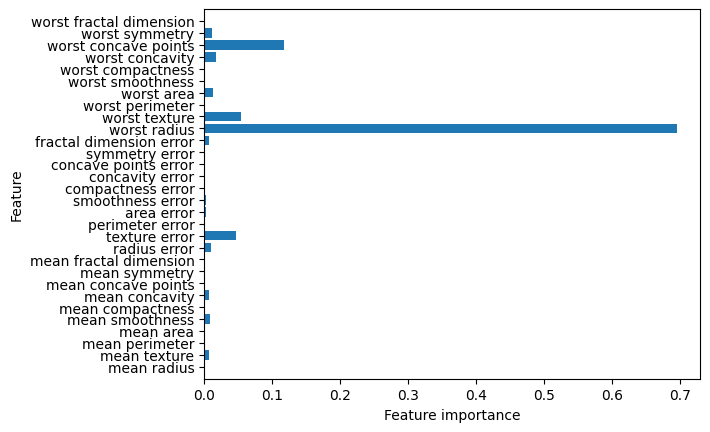

In [ ]:
def plot_frature_importance_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel('Feature importance')
  plt.ylabel('Feature')
  plt.ylim(-1,n_features)
plot_frature_importance_cancer(clf)

# 05/18

## CART(Classification And Regression Tree)

-예측 및 분류 문제를 Tree로 문제 풀 수 있음.
- Tree가 많아질수록 Overfitting 초래(= high variance, low bias)

- CART 알고리즘은 지니 지수(Gini Index) 또는 분산의 감소량을 사용하여 나무의 가지를 이진(Binary) 분리한다. (범주형 변수에 대해서는 지니 지수를 사용하고, 연속형 변수에 대해서는 분산의 감소량을 사용한다.)
참고자료 : 사례로 배우는 데이터마이닝 [자유아카데미, 최종후/소선하] p.28





| 알고리즘 | 평가지수(선택방법) | 비고 |
|:---:|:----:|:----|
| ID3 | Entropy | 다지분리(범주) |
| C4.5 | Information Gain | 다지분리(범주) 및 이진분리(수치) |
| C5.0 | 카이제곱(범주), F검정(수치) | 통계적 접근 방식
| CART | Gini index(범주), 분산의 차이(수치) |통계적 접근 방식, 항상 2진 분리|

**알고리즘 차이 참고(*https://leedakyeong.tistory.com/entry/Decision-Tree%EB%9E%80-ID3-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)**


#랜덤 포레스트(Random Forest)

- 오늘날 쓰이는 머신 러닝 알고리즘 중에서 **가장 강력한 성능을 자랑하는 알고리즘**

- 랜덤 포레스트는 이 중 **배깅 방법**을 적용한 결정트리(Dicison Tree)의 앙상블

- 랜덤 포레스트 알고리즘은 **결정트리(Dicision Tree) 분류기 여러 개를 훈련**시켜서 그 결과들을 가지고 예측을 함. 각각의 결정트리를 훈련시킬 때 배깅(Bagging). 즉, 훈련 세트에서 중복을 허용하여 샘플링한 데이터셋을 개별 결정트리 분류기의 훈련 세트로 하여 훈련시키는 방식.


#### 장점 :
1. 분류, 회귀에서 가장 널리 쓰이는 알고리즘으로 성능이 좋고 정확도가 높다
2. 간편하고 빠르다.
3. 큰 데이터 셋에서도 잘 사용되며, 많은 입력 변수들을 다룰 수 있다.

#### 단점 : 
1. 속도와 메모리 비용이 상대적(linear에 비해)으로 큼
(더 많은 트리 -> 정확도는 높아지나 시간과 리소스 소모가 큼)

2. 트리 깊이와 개수 설정을 잘못하여 과적합(Overfiting)발생.




#### 랜덤 포레스튼튼 훈련을 통해 구성해 놓은 다수의 의사결정트리들로부터 분류 결과를 취합해서 예측하는 앙상블 모델이라고 할 수 있음.

<figure>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdQRp2AYzLvDCg88pi6c2CRYQ_6qNBGVDn7A&usqp=CAU' width=700 height=300>
</figure>



##코드 실습
참고 : 파이썬 완벽가이드


##### 배깅(Bagging)

- 통계학에서 중복한 허용한 리샘플링(resampling)을 부트스트래핑(boostraping)이라 하고 이와 반대로 중복을 허용하지 않는 샘플링 방식을 페이스팅(pasting)이라고 함.



ex) 10만개의 데이터 중 7만 5천개의 데이터를 학습데이터로 사용한다고 가정하면

7만 5천개의 데이터를 가지고 여러 데이터 셋으로 나눈다면 학습데이터가 부족해지고 이로인해 모형들이 편향히 생기거나 분산이 커지는 문제가 생길 수 있다.

하지만 배깅의 경우는 복원추출(Resampling)을 하기 때문에 어떤 데이터는 여러번 뽑힐 수 있고 어떤 데이터는 한번도 뽑히지 않을 수도 있다 때문에 75000개의 데이터를 가지고 75000번을 추출해도 75000가지의 서로 다른 샘플데이터를 추출할 수 있게 됨.

이 특성을 이용해 조금씩 다른 모델들을 만들고 그것들의 결과를 취합하는 것이다.

데이터가 비슷하니 결과도 별 차이가 없다고 생각할 수 있지만 데이터가 빼곡해지는 효과가 있고, 조금씩 다른 모델들이 투표를 하는 방식으므로 배깅으로 만들어진 앙상블 모델은 결과들에 대한 편차가 크지 않고 안정적인 결과를 보여지도록 향상됨.

학습데이터가 원래 편향이 있다면 그로 인한 편향문제까지는 해결하지 못하지만 미지의 데이터(Unseen data)에 상당히 괜찮은 성능을 보이고 노이즈나 아웃라이어에 대해서도 강해지는 것으로 알려져 있음.



<figure>
    <img src='https://miro.medium.com/max/1678/1*Wf91XObaX2zwow7mMwDmGw.png' width=700 height=300>
</figure>

출처 : https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

- 이 의사결정나무들은 모두 같은 의사결정나무일 수가 없다

- Bootstrap으로 샘플을 추출했기 때문에, 어느 정도의 중복과 함께 각기 다른 샘플로 의사 결정나무 모델을 만들었다고 할 수 있다.


##  Hyperparameter
- n_estimators: 랜덤 포레스트 안의 결정 트리 갯수

 - n_estimators는 클수록 좋습니다.
 - 결정 트리가 많을수록 더 깔끔한 Decision Boundary가 나오겠죠.
 - 하지만 그만큼 메모리와 훈련 시간이 증가합니다.
Default는 10입니다.
 - max_features: 무작위로 선택할 Feature의 개수

-  max_features=n_features이면 30개의 feature 중 30개의 feature 모두를 선택해 결정 트리를 만듭니다.
단, bootstrap=True이면 30개의 feature에서 복원 추출로 30개를 뽑습니다.
-  특성 선택의 무작위성이 없어질 뿐 샘플링의 무작위성은 그대로인 것입니다.
-  bootstrap=True는 default 값입니다.
-  따라서 max_features 값이 크다면 랜덤 포레스트의 트리들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측을 할 것입니다.
-  max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 매우 달라질 것입니다. 따라서 오버피팅이 줄어들 것입니다.
-  max_features는 일반적으로 Defalut 값을 씁니다.
-  max_depth : 트리의 깊이를 뜻합니다.

-  min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수 입니다.

-  min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수 입니다.

-  max_leaf_nodes : 리프노드의 최대 개수

In [ ]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=3d3351f72eb2f829629dcf141d7609945941c2555f9d14f62f2baa8b04b1adfb
  Stored in directory: /root/.cache/pip/wheels/11/33/5e/10b9333a84e80e0c099acf23ccc525e2607ecad167aa881be9
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons # 가상의 데이터
from sklearn.model_selection import train_test_split

x,y = make_moons(n_samples=100, noise=0.25, random_state=42)
#noise : Standard deviation of Gaussian noise added to the data

X_train,X_test,y_train,y_test = train_test_split(x,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5,n_jobs=-1,random_state=42)
#n_estimators : 사용할 tree수 / n_jobs : 가용되는 CPU 갯수(-1이면 모두 사용해주세요.)
forest.fit(X_train,y_train)

import matplotlib.pyplot as plt
import numpy as np
from mglearn.plots import plot_2d_classification

_, axes = plt.subplots(2,3) #2행 3열을 그릴겁니다.
marker_set = ['o','^'] #그림 그릴 때 모양은 o모양과 ^모양으로 해주세여.
#axs.ravel() : 축을 평평하게 펴주세요, forest.estimator_:예측된 라벨.
#axs.flatten()
for i,(axe,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  axe.set_title('tree {}'.format(i)) # axe의 이름을 달아주세여
  plot_2d_classification(tree, x, fill=True,ax=axe, alpha=0.4) # plot_2d_classification그려주세요.
  for i, m in zip(np.unique(y), marker_set): # np.unique : 중복을 제거 , marker_set기준으로
    axe.scatter(x[y==i][:,0], x[y==i][:, 1], marker=m,label='class {}'.format(i), edgecolors='k')
    axe.set_xlabel('feature 0')
    axe.set_ylabel('feature 1')
axes[-1,-1].set_title('random_forest')
axes[-1,-1].set_xlabel('feature 0')
axes[-1,-1].set_ylabel('feature 1')
plot_2d_classification(forest,x,fill=True,ax=axes[-1,-1],alpha=1)
for i,m in zip(np.unique(y),marker_set):
  plt.scatter(x[y==i][:,0],x[y==i][:,1],marker=m,label='class {}'.format(i), edgecolors='k')
plt.show()



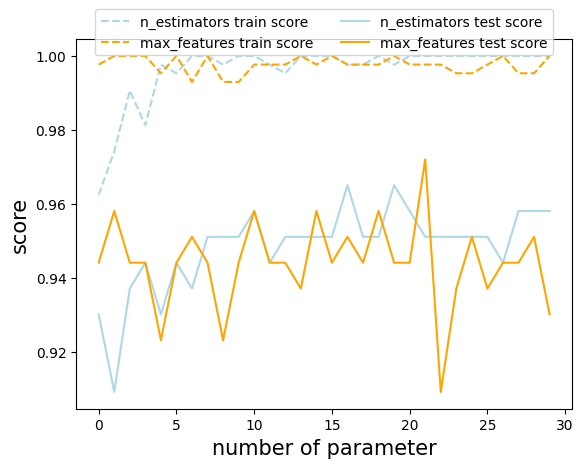

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,
                                                 stratify = cancer.target,
                                                 random_state=42)

n_features = cancer.data.shape[1]

score_n_tr_est = []
score_n_te_est = []
score_m_tr_mft = []
score_m_te_mft = []

for i in np.arange(1,n_features+1):
#n_estimators와 max_feature는 모두 0보다 큰 정수여야하므로#1부터 시작합니다.
  params_n = {'n_estimators': i, 'max_features':'auto', 'n_jobs':-1} # **kwargs parameter
  params_m = {'n_estimators': 10, 'max_features':i, 'n_jobs':-1}
  forest_n = RandomForestClassifier(**params_n).fit(X_train,y_train)
  forest_m = RandomForestClassifier(**params_m).fit(X_train,y_train)

  score_n_tr = forest_n.score(X_train,y_train)
  score_n_te = forest_n.score(X_test,y_test)
  score_m_tr = forest_m.score(X_train,y_train)
  score_m_te = forest_m.score(X_test,y_test)

  score_n_tr_est.append(score_n_tr)
  score_n_te_est.append(score_n_te)
  score_m_tr_mft.append(score_m_tr)
  score_m_te_mft.append(score_m_te)
index = np.arange(len(score_n_tr_est))
plt.plot(index, score_n_tr_est, label='n_estimators train score',color='lightblue',ls='--') #ls:linestyle
plt.plot(index, score_m_tr_mft, label='max_features train score', color='orange', ls='--')
plt.plot(index, score_n_te_est, label='n_estimators test score', color='lightblue')
plt.plot(index, score_m_te_mft, label='max_features test score', color='orange')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=2, fancybox=True, shadow=False) 
# fancybox: 박스모양, shadow: 그림자
plt.xlabel('number of parameter', size=15)
plt.ylabel('score', size=15)
plt.show()

- 시각화

In [ ]:
n_features = cancer.data.shape[1]

index = np.arange(n_features)

forest = RandomForestClassifier(n_estimators =10,n_jobs=-1)
forest.fit(X_train,y_train)
plt.barh(index, forest.feature_importances_, align='center') #plt.ploth : Horizontal bar graph
plt.yticks(index,cancer.feature_names)
plt.ylim(-1,n_features)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature',size=15)
plt.show()

### 피마 인디언 당뇨병 예측

### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- 당뇨병 여부를 판단.
- 피마 인디언 당뇨병 데이터 셋트는 북아메리카 피마 지역 원주민의  Type-2 당뇨병 결과 데이터. 

- 보통 당뇨 원인으로 식습관과 유전을 꼽습니다.

- 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 당뇨 환자가 생김.

 - Pregnancies : 임신 횟수 -> Number of times pregnant
 - Glucose : 포도당 부하 검사 수치 -> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - bloodPressure:혈압(mm Hg) -> Diastolic blood pressure (mm Hg)
 - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm) ->Triceps skin fold thickness (mm)
 - Insulin : 2시간 혈청 인슐린(mu U/ml) ->2-Hour serum insulin (mu U/ml)
 - BMI : 체질량 지수( 체중(kg) / (키(m)^2)) -> Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigressFunction : 당뇨병 혈통 기능. ->Diabetes pedigree function
 - Age : 나이 ->age(years)
 - Outcome : class 결정 값 (0 또는 1) -> Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 결측치 plot

<Axes: >

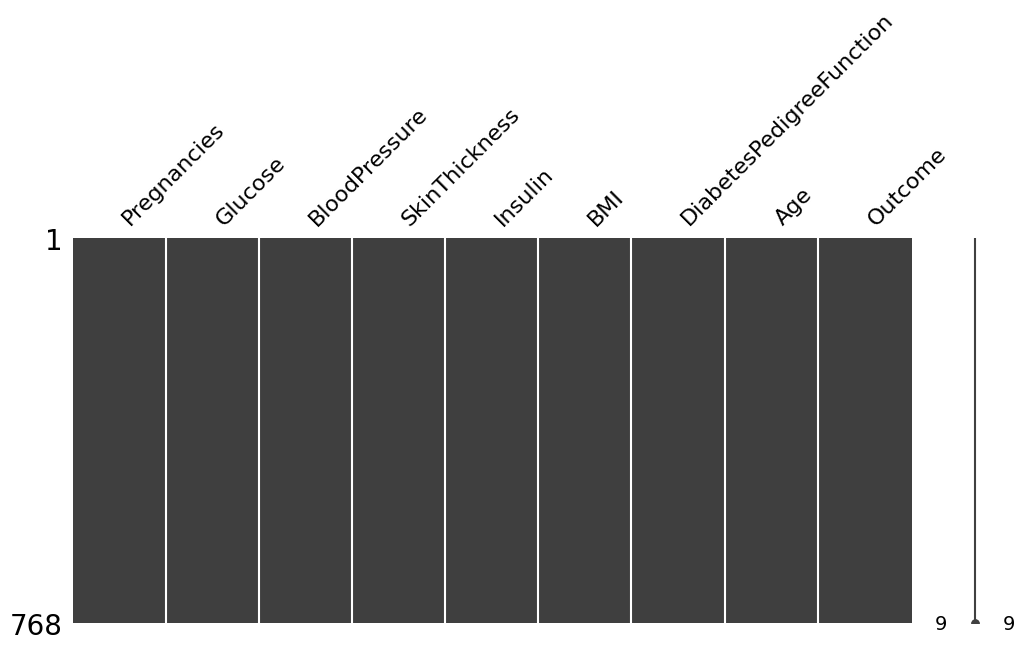

In [ ]:
import missingno as msno #결측치 보는 plot
msno.matrix(data,figsize=(12,5)) #결측치가 있다면 하얀색 줄이 그어짐.

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data['Glucose'].d

<bound method NDFrame.describe of 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64>

In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# 히트맵

<Axes: >

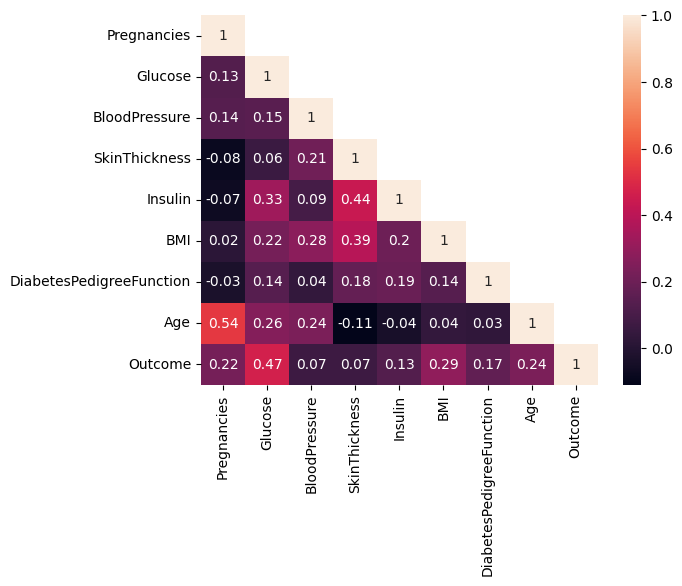

In [ ]:
data_1 = data.corr()
mask = np.array(data_1)
mask[np.tril_indices_from(mask)]=False
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix,mask=mask,annot=True)

In [ ]:
data2 = data.copy()

In [ ]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#'count' 데이터에서 전체의 25%에 해당하는 데이터 조회
Outcome_q1 = np.percentile(data2['Outcome'],25)
Outcome_q1

#'count' 데이터에서 전체의 75%에 해당하는 데이터 조회
Outcome_q3 = np.percentile(data2['Outcome'],75)
Outcome_q3

# IQR = Q3-Q1
Outcome_IQR = Outcome_q3 - Outcome_q1
Outcome_IQR

# 이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
data2_IQR = data2[(data2['Outcome']>=(Outcome_q1 - (1.5*Outcome_IQR))) &  
                   (data['Outcome']<=(Outcome_q3 + (1.5*Outcome_IQR)))]
print(data2_IQR)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
data2_sigma = data2[np.abs(data2['Outcome'] - data2['Outcome'].mean()) < 
                              (3*data2['Outcome'].std())]
print(data2_sigma)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data =data2_IQR, x='SkinThickness',y='Insulin',ax=ax1)

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data =data2, x='SkinThickness',y='Insulin',ax=ax1)

# Age와 Pregnancies의 상관 관계
 - 산점도 회귀그래프로 그려봄

In [ ]:
names = ['Pregnancies','Age']
data_df = data.loc[:,names]

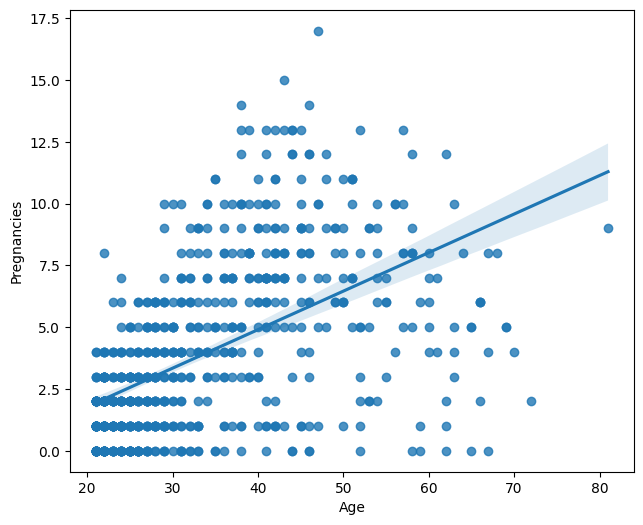

In [ ]:
plt.figure(figsize=(16,6))
for i,name in enumerate(names[1:]):
    ax = plt.subplot(1,2,i+1)
    sns.regplot(x=name, y=names[0], data = data_df,ax=ax)
plt.show()

# Pregnancies와 Outcome의 관계
  - 회귀 그래프로 그려봄

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

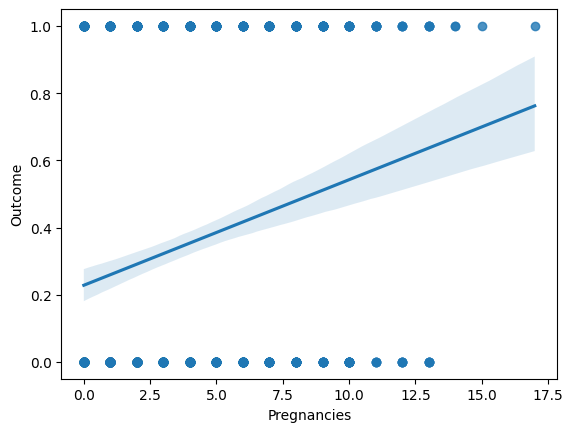

In [ ]:
sns.regplot(x='Pregnancies', y='Outcome',data = data)

In [ ]:
def bar_chart(feature):
  yes = data[data['Outcome'] ==1][feature].value_counts() # 생존자를 카운트

  no = data[data['Outcome'] ==0][feature].value_counts() #사망자를 카운트
  df = pd.DataFrame([yes,no]) #[생존자,사망자]를 dataFrame
  df.index = ['yes','no'] # index화
  sns.scatterplot() #그림을 그림

# 이상치 처리 후 히트맵

<Axes: >

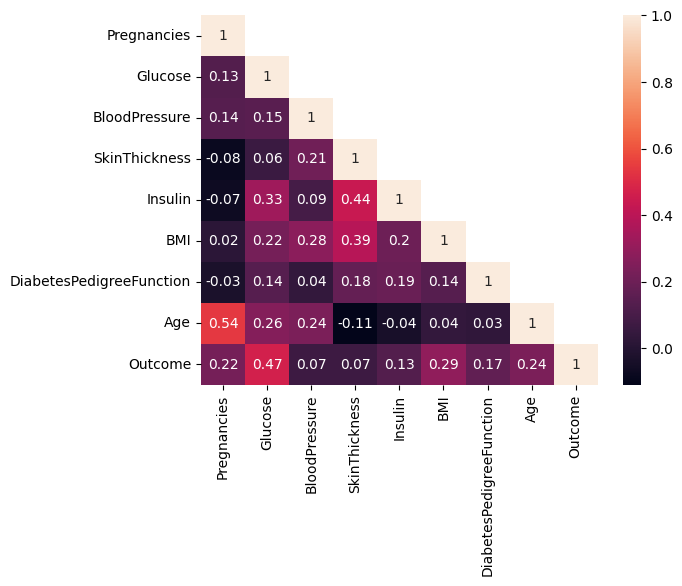

In [ ]:
data_2 = data2_IQR.corr()
mask = np.array(data_2)
mask[np.tril_indices_from(mask)]=False
correlation_matrix = data2_IQR.corr().round(2)
sns.heatmap(data=correlation_matrix,mask=mask,annot=True)

In [ ]:
data['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

# - 이차원 밀집도 그래프로 그림
  - 나이에 따른 당뇨병 환자
  - 30대까지는 안 걸린 사람이 많다가 이후에는
  걸리는 사람이 많음

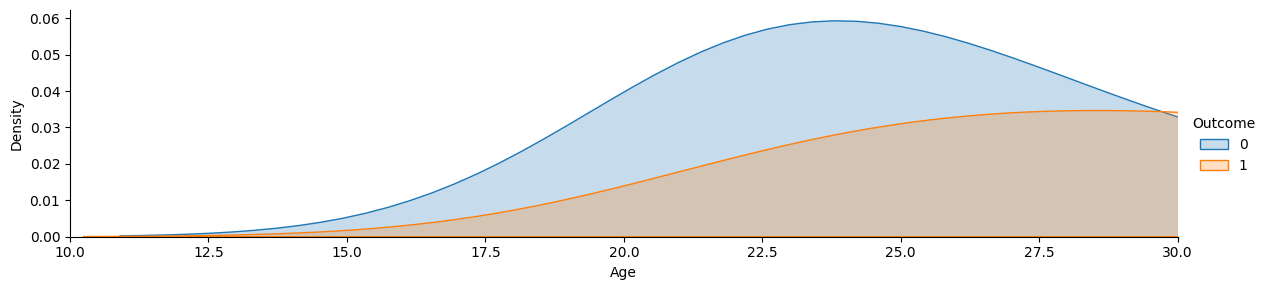

In [ ]:
facet = sns.FacetGrid(data, hue ='Outcome', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,data['Age'].max()))
facet.add_legend()
sns.axes_style('dark')
plt.xlim(10,30)
plt.show()

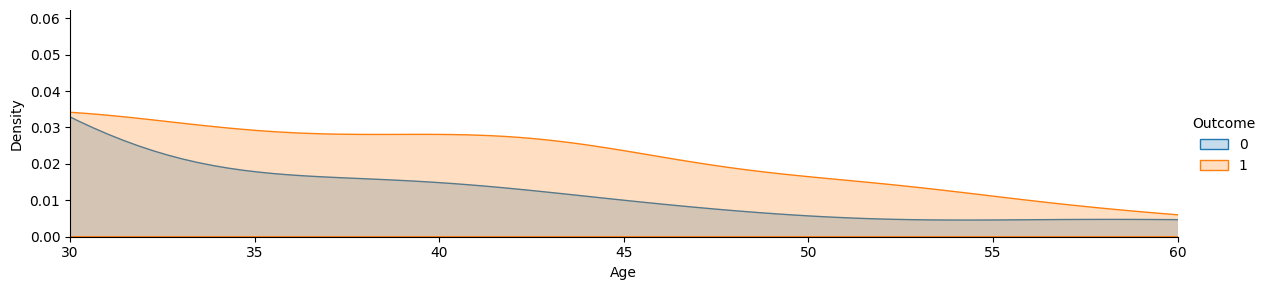

In [ ]:
facet = sns.FacetGrid(data, hue ='Outcome', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,data['Age'].max()))
facet.add_legend()
sns.axes_style('dark')
plt.xlim(30,60)
plt.show()  

# Glucose와 Outcome의 관계


In [ ]:
data['Glucose'].value_counts

<bound method IndexOpsMixin.value_counts of 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64>

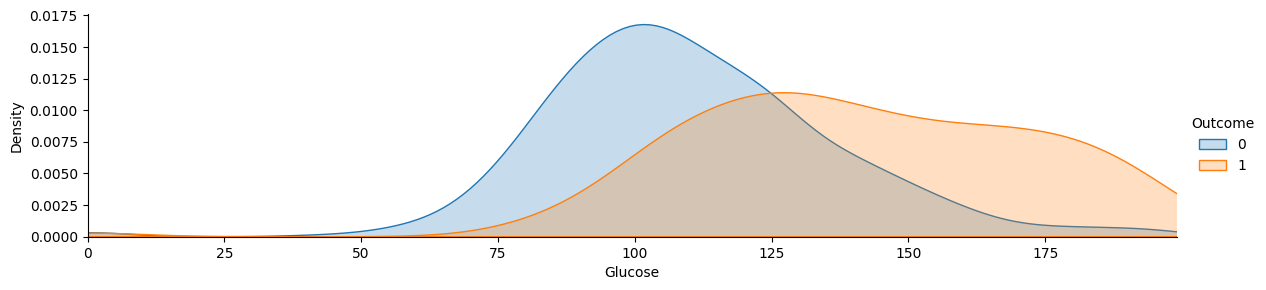

In [ ]:
facet = sns.FacetGrid(data, hue ='Outcome', aspect=4)
facet.map(sns.kdeplot,'Glucose',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,data['Glucose'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

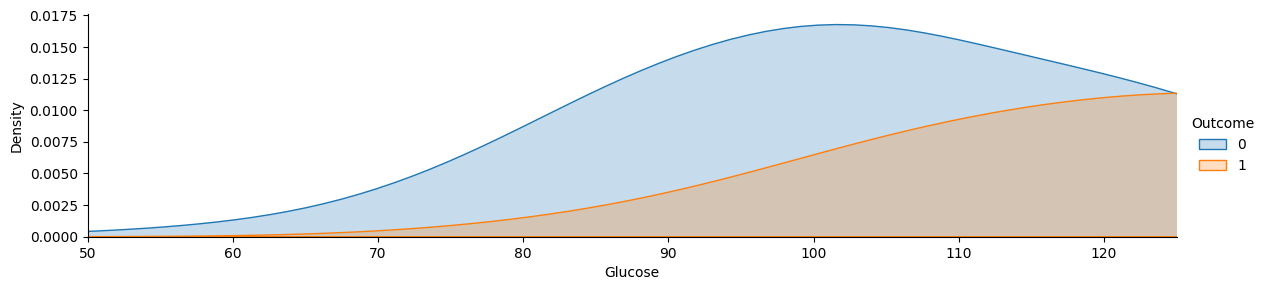

In [ ]:
facet = sns.FacetGrid(data, hue ='Outcome', aspect=4)
facet.map(sns.kdeplot,'Glucose',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,data['Glucose'].max()))
facet.add_legend()
sns.axes_style('dark')
plt.xlim(50,125)
plt.show()

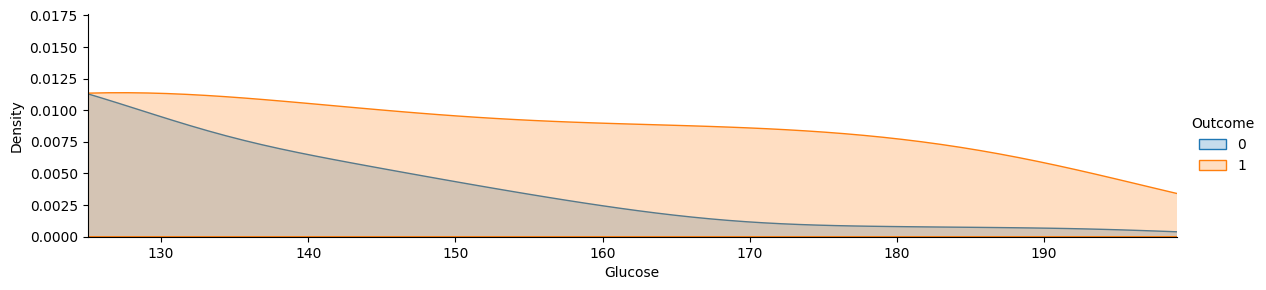

In [ ]:
facet = sns.FacetGrid(data, hue ='Outcome', aspect=4)
facet.map(sns.kdeplot,'Glucose',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,data['Glucose'].max()))
facet.add_legend()
sns.axes_style('dark')
plt.xlim(125,)
plt.show()

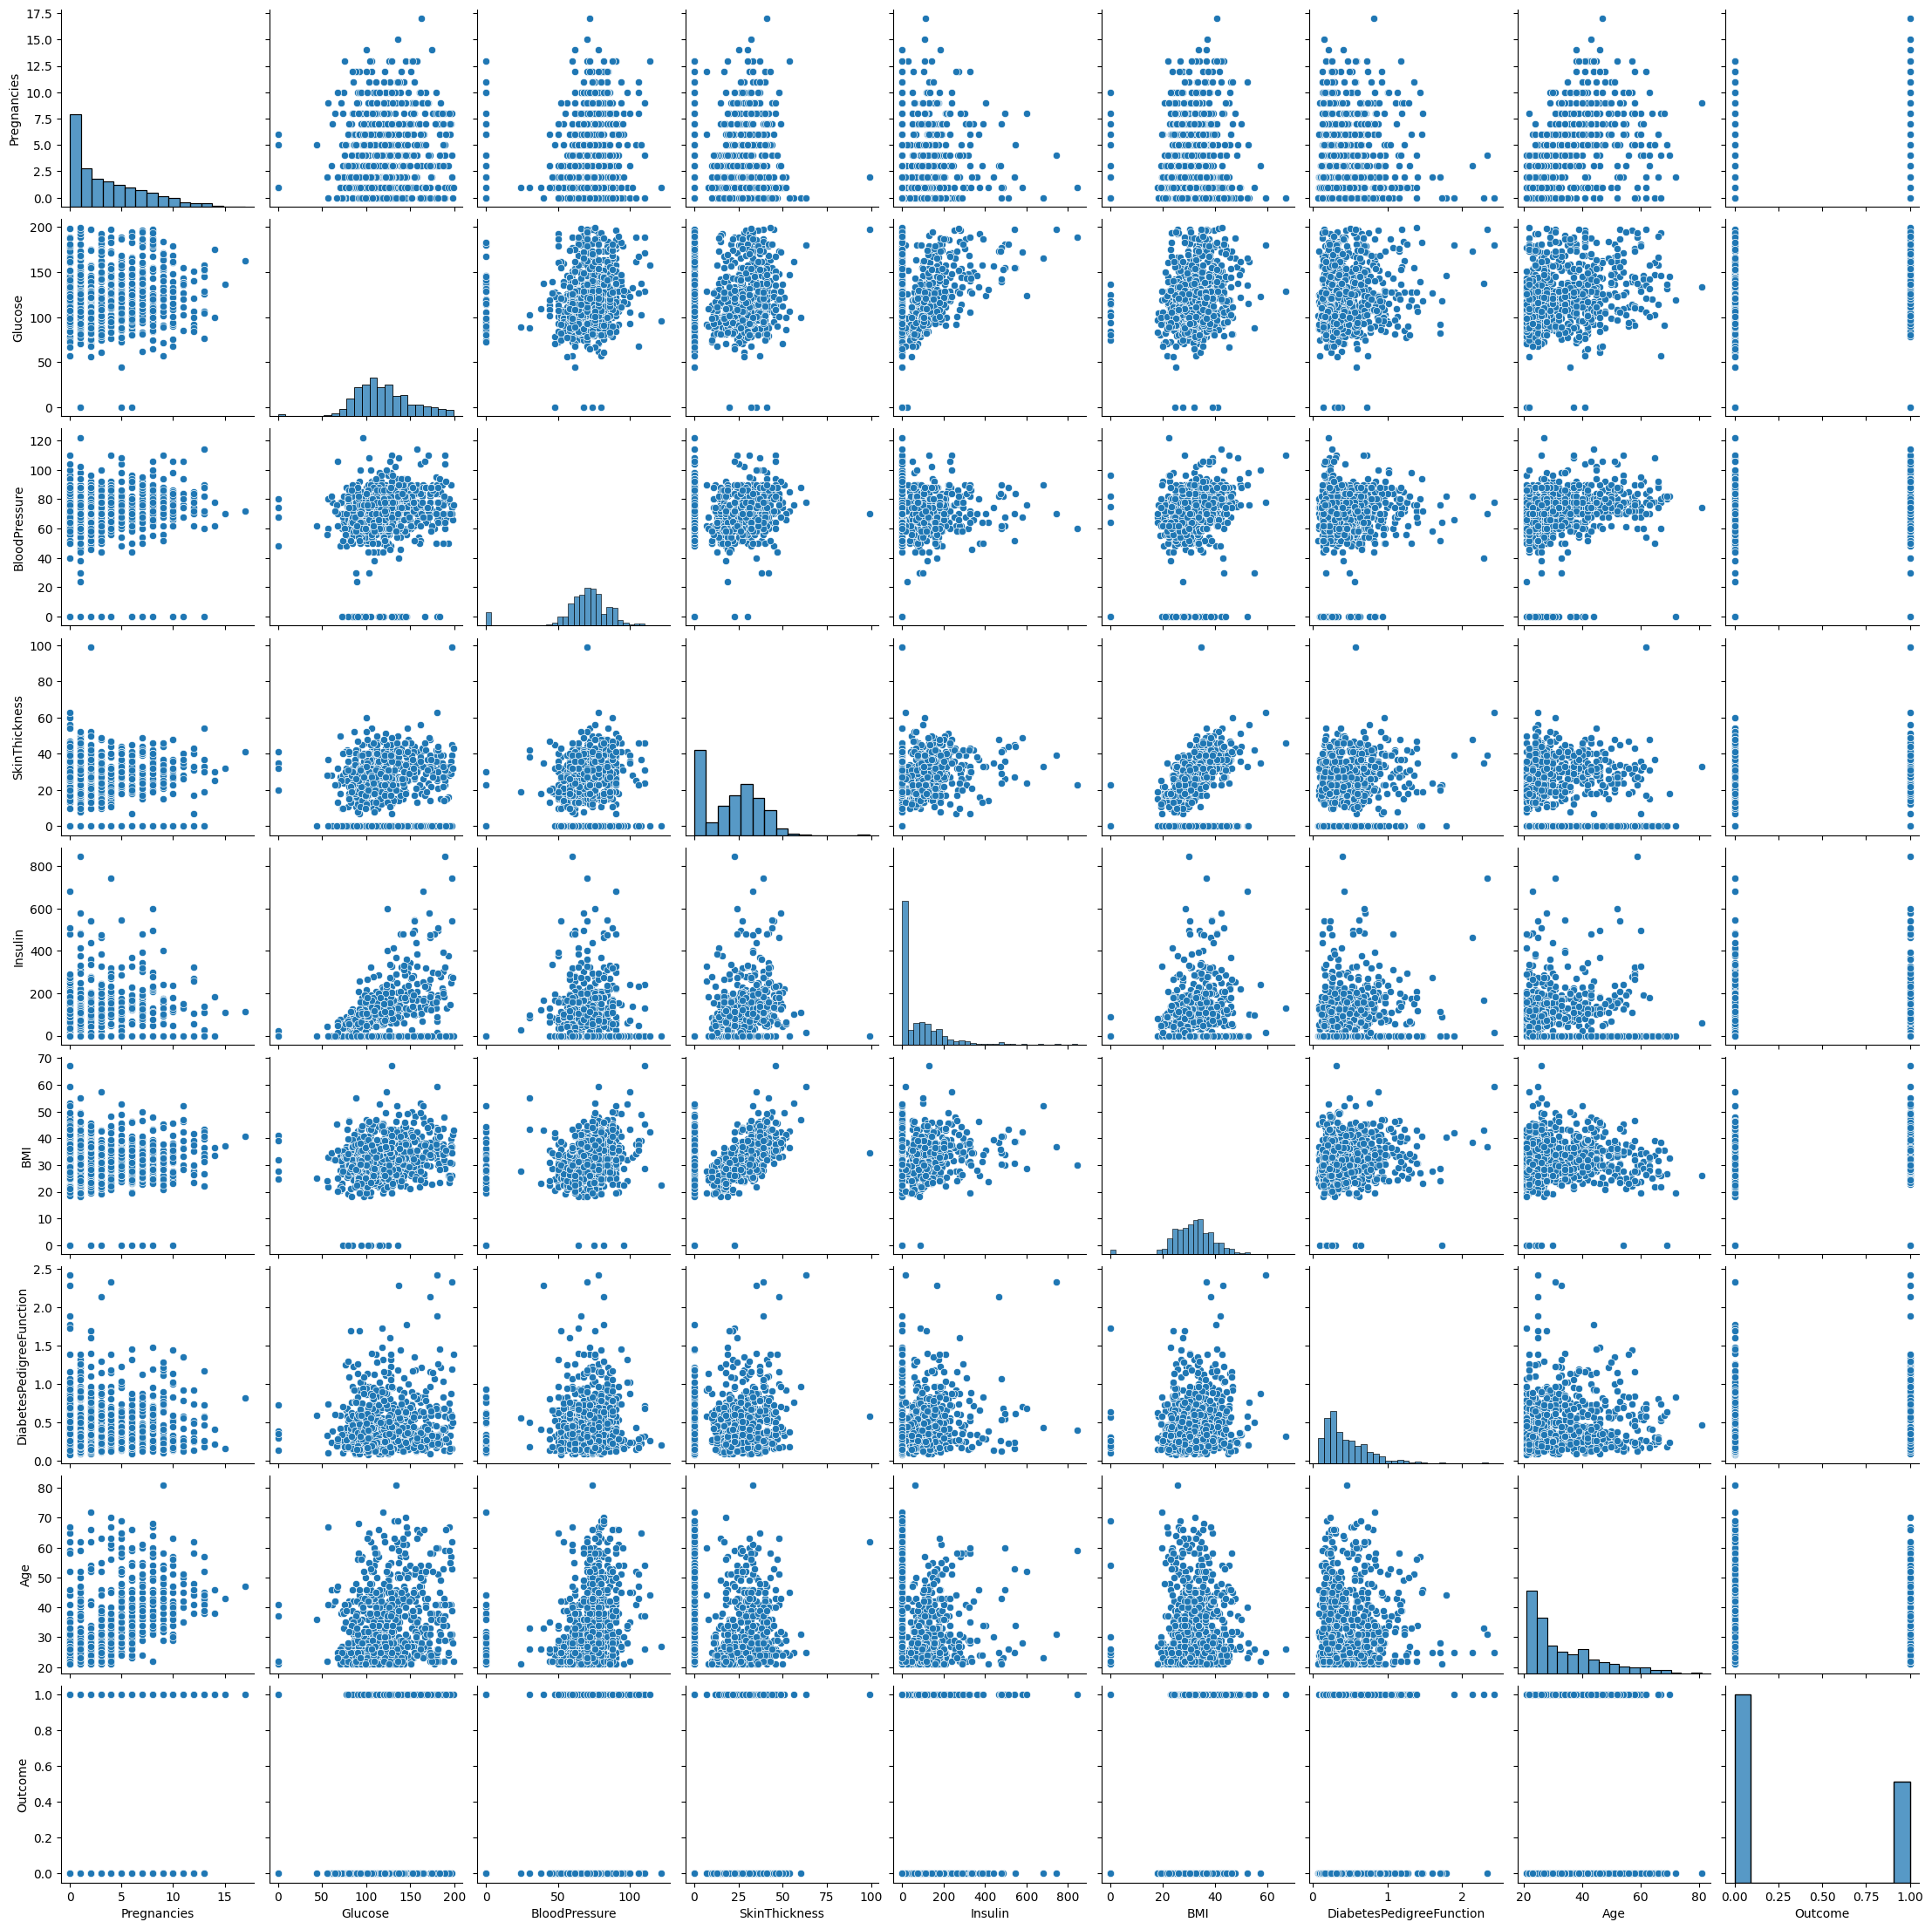

In [ ]:
sns.pairplot(data)

# 당뇨병 환자 비율
  - 1 --> 걸림
  - 0 --> 안 걸림

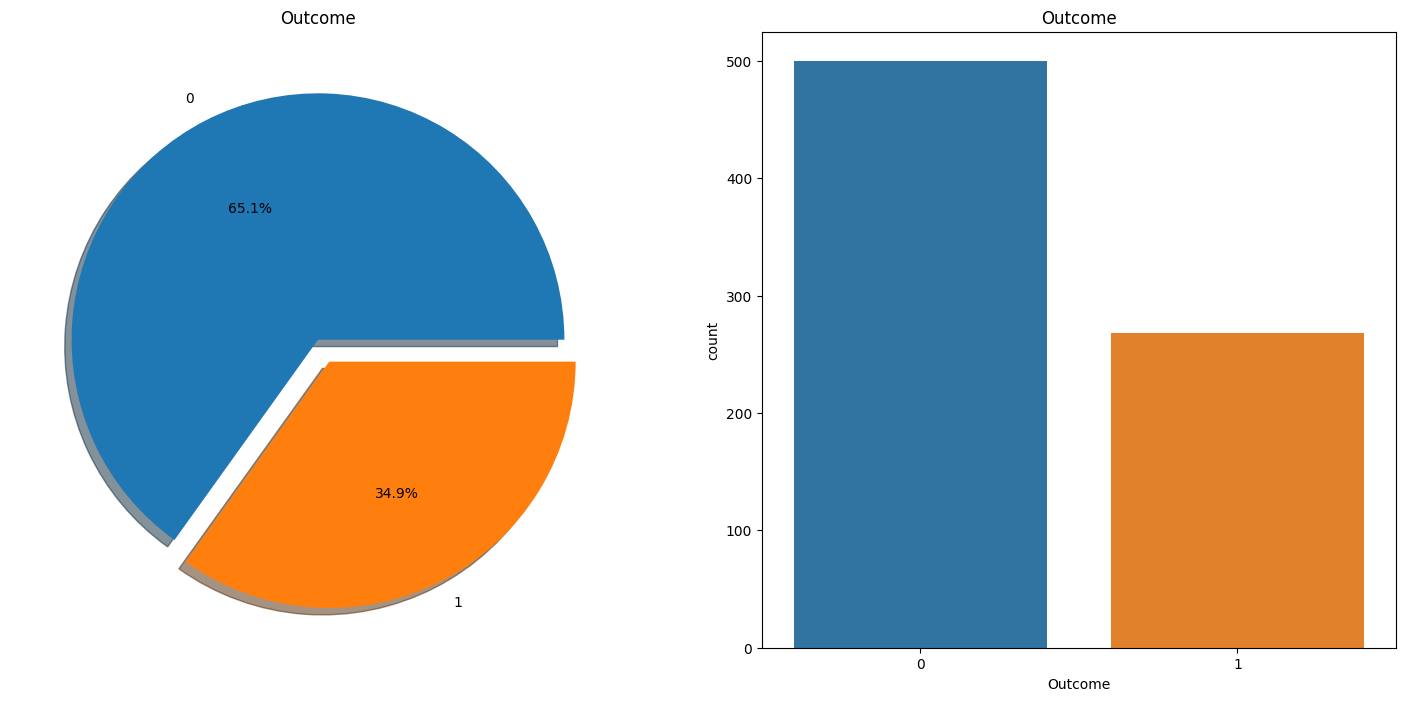

In [ ]:
f,ax = plt.subplots(1,2, figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#exploed : 각 항목을 파이의 원점에서 튀어나오는 정도를 나타냄
#autopct : 각 항목의 퍼센트를 표시함.
#shadow : 그림자를 그릴 것 인지?
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x=data['Outcome'],ax = ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.Outcome[:3]

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [ ]:
data[:3]

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(dir(data))

['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose', 'Insulin', 'Outcome', 'Pregnancies', 'SkinThickness', 'T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__'

In [ ]:
data2.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 결측치 처리

In [ ]:
# data2[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = data2[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [ ]:
# data2.fillna(data2.mean())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data2.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
data2['Glucose'].fillna(data2['Glucose'].mean(skipna=True), inplace=True)
data2['BloodPressure'].fillna(data2['BloodPressure'].mean(skipna=True), inplace=True)
data2['SkinThickness'].fillna(data2['SkinThickness'].mean(skipna=True), inplace=True)
data2['Insulin'].fillna(data2['Insulin'].mean(skipna=True), inplace=True)
data2['BMI'].fillna(data2['BMI'].mean(skipna=True), inplace=True)

In [ ]:
data2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
data2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data2.mean()

Pregnancies                   3.845052
Glucose                     121.656250
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

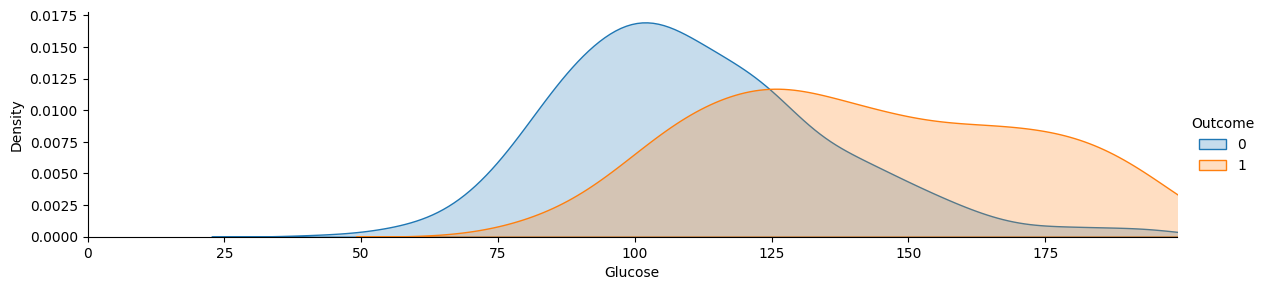

In [ ]:
facet = sns.FacetGrid(data2, hue ='Outcome', aspect=4)
facet.map(sns.kdeplot,'Glucose',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,data2['Glucose'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

<Axes: >

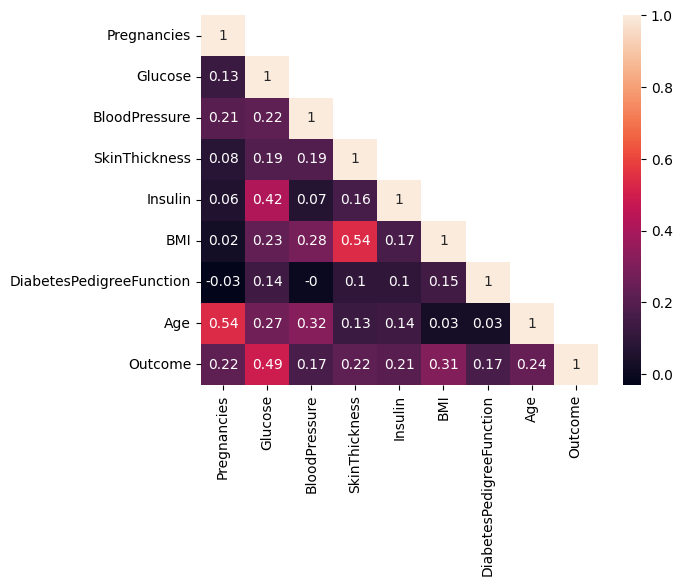

In [ ]:
data_2 = data2.corr()
mask = np.array(data_2)
mask[np.tril_indices_from(mask)]=False
correlation_matrix = data2.corr().round(2)
sns.heatmap(data=correlation_matrix,mask=mask,annot=True)

In [ ]:
data2.corr().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.08,0.06,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.22,0.19,0.42,0.23,0.14,0.27,0.49
BloodPressure,0.21,0.22,1.00,0.19,0.07,0.28,-0.00,0.32,0.17
SkinThickness,0.08,0.19,0.19,1.00,0.16,0.54,0.10,0.13,0.22
Insulin,0.06,0.42,0.07,0.16,1.00,0.17,0.10,0.14,0.21
BMI,0.02,0.23,0.28,0.54,0.17,1.00,0.15,0.03,0.31
DiabetesPedigreeFunction,-0.03,0.14,-0.00,0.10,0.10,0.15,1.00,0.03,0.17
Age,0.54,0.27,0.32,0.13,0.14,0.03,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.22,0.21,0.31,0.17,0.24,1.00


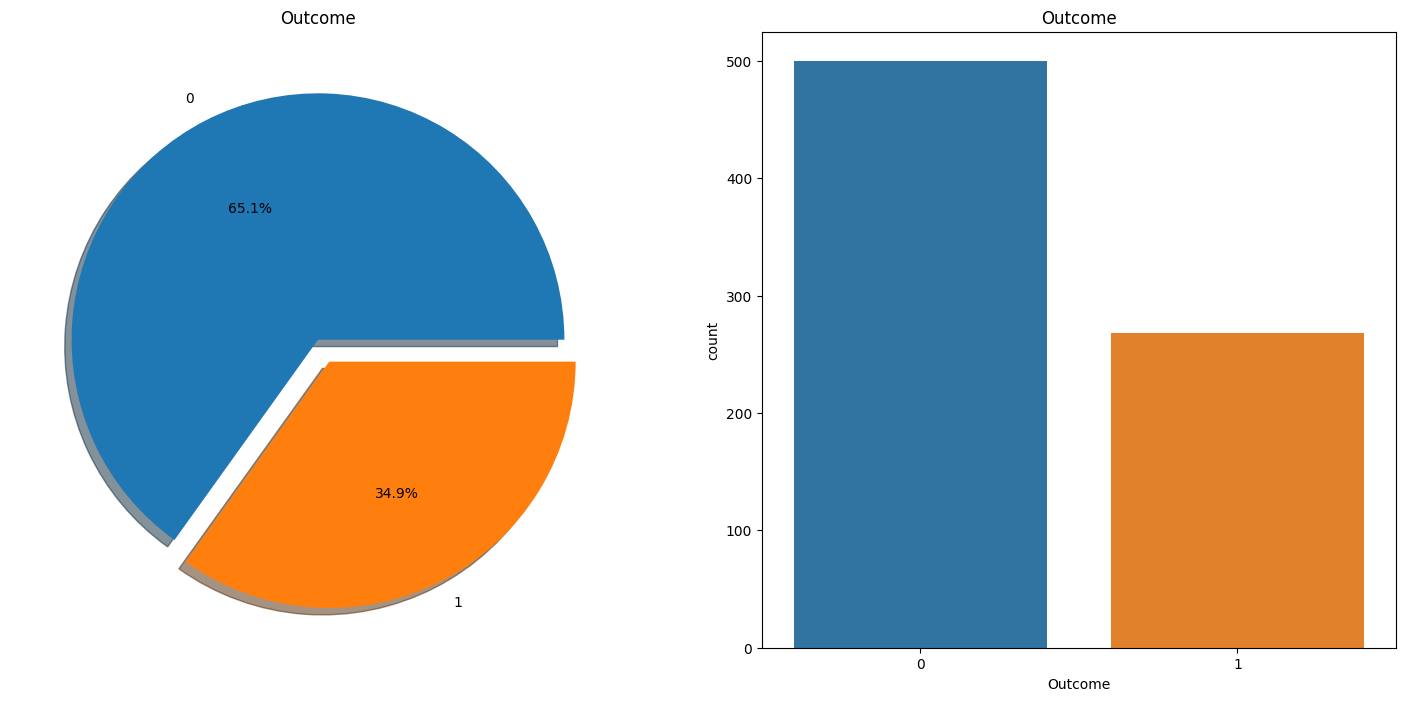

In [ ]:
f,ax = plt.subplots(1,2, figsize=(18,8))
data2['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#exploed : 각 항목을 파이의 원점에서 튀어나오는 정도를 나타냄
#autopct : 각 항목의 퍼센트를 표시함.
#shadow : 그림자를 그릴 것 인지?
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x=data2['Outcome'],ax = ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
data2['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [ ]:
print('Percent of missing "BloodPressure" records is %.2f%%' %((data2['BloodPressure'].isnull().sum()/
                                                      data2.shape[0])*100))

Percent of missing "BloodPressure" records is 0.00%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data2, data.Outcome, stratify=data.Outcome, random_state=0)

gbc = GradientBoostingClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1

gbc.fit(x_train, y_train)

score_train = gbc.score(x_train, y_train) # train set 정확도

print('{:.3f}'.format(score_train))

score_test = gbc.score(x_test, y_test) # 일반화 정확도

print('{:.3f}'.format(score_test))

1.000
1.000


In [ ]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01) # 기본값 0.1

gbc.fit(x_train, y_train)



score_train_lr = gbc.score(x_train, y_train)

print('{:.3f}'.format(score_train_lr))

score_test_lr = gbc.score(x_test, y_test) 

print('{:.3f}'.format(score_test_lr))

1.000
1.000


In [ ]:
target = data['Outcome']
train = data.drop('Outcome',axis = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split



X_train,X_test,y_train,y_test = train_test_split(train, data2.Outcome,
                                                 stratify=data2.Outcome,
                                                 random_state = 42) # stratify : target
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
print('Accuracy on training set : {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy on test set : {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.745


In [ ]:
clf = DecisionTreeClassifier(max_depth=10,random_state=0)
clf.fit(X_train,y_train)
print('Accuracy on training set : {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy on test set : {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy on training set : 0.965
Accuracy on test set : 0.729


In [ ]:
clf

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
data2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
635,13,104,72,0,0,31.2,0.465,38
698,4,127,88,11,155,34.5,0.598,28
637,2,94,76,18,66,31.6,0.649,23
402,5,136,84,41,88,35.0,0.286,35
425,4,184,78,39,277,37.0,0.264,31
...,...,...,...,...,...,...,...,...
62,5,44,62,0,0,25.0,0.587,36
477,7,114,76,17,110,23.8,0.466,31
311,0,106,70,37,148,39.4,0.605,22
116,5,124,74,0,0,34.0,0.220,38


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file = 'tree.dot',feature_names = X_test.columns,impurity=False, filled = True)

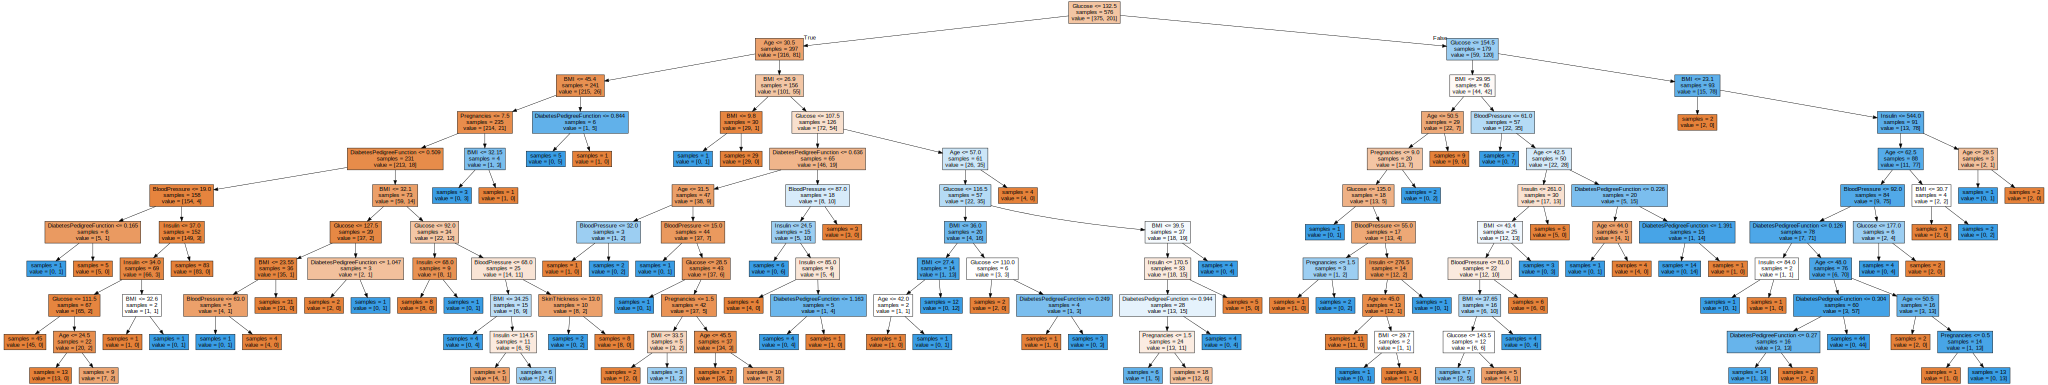

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align ='center') # #align ='center' : 중앙 정렬
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)
plot_feature_importance_cancer(clf)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train, target)
clf.score(train, target)

0.7825520833333334

In [ ]:
target = data['Outcome']
train = data.drop('Outcome',axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,target,stratify=target,random_state=777)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(576, 8) (192, 8)
(576,) (192,)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.7916666666666666

In [ ]:
y_test.shape

(192,)

In [ ]:
pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print('테스트 데이터셋 오차 행렬\n', confusion_matrix(y_test,pred))

테스트 데이터셋 오차 행렬
 [[111  14]
 [ 31  36]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       125
           1       0.72      0.54      0.62        67

    accuracy                           0.77       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



In [ ]:
target = data2['Outcome']
train = data2.drop('Outcome',axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,target,stratify=target,random_state=777)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(576, 8) (192, 8)
(576,) (192,)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.7777777777777778

In [ ]:
y_test.shape

(192,)

In [ ]:
pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print('테스트 데이터셋 오차 행렬\n', confusion_matrix(y_test,pred))

테스트 데이터셋 오차 행렬
 [[109  16]
 [ 32  35]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       125
           1       0.69      0.52      0.59        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192

